<a href="https://colab.research.google.com/github/rightpeeps/AI_06_Section1_Project1/blob/main/AI_06_%EC%A0%95%EC%9A%B0%EB%AF%BC_Section2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Section 2 - Project

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

df = pd.read_csv('../content/drive/MyDrive/DATA/Motor_Vehicle_Collisions_-_Crashes_filtered3.csv')
df.head()

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,01/01/2018,4:16,MANHATTAN,10025.0,40.801800,-73.96108,"(40.8018, -73.96108)",CATHEDRAL PARKWAY,MORNINGSIDE DRIVE,NaN,1,0.0,0,0,0,0,1,0,Other Vehicular,Following Too Closely,NaN,NaN,NaN,3820157,Sedan,Sedan,NaN,NaN,NaN
1,01/01/2018,20:30,QUEENS,11373.0,40.743973,-73.88510,"(40.743973, -73.8851)",BROADWAY,BAXTER AVENUE,NaN,0,0.0,0,0,0,0,0,0,Unsafe Speed,Failure to Yield Right-of-Way,NaN,NaN,NaN,3818846,Sedan,Sedan,NaN,NaN,NaN
2,01/01/2018,15:30,MANHATTAN,10025.0,40.801740,-73.96477,"(40.80174, -73.96477)",WEST 108 STREET,AMSTERDAM AVENUE,NaN,0,0.0,0,0,0,0,0,0,Driver Inattention/Distraction,Unspecified,NaN,NaN,NaN,3818947,Sedan,NaN,NaN,NaN,NaN
3,01/01/2018,1:37,BROOKLYN,11212.0,40.662277,-73.91078,"(40.662277, -73.91078)",LIVONIA AVENUE,BRISTOL STREET,NaN,0,0.0,0,0,0,0,0,0,Backing Unsafely,Unspecified,NaN,NaN,NaN,3819256,Sedan,Sedan,NaN,NaN,NaN
4,01/01/2018,16:30,MANHATTAN,10035.0,40.805058,-73.93904,"(40.805058, -73.93904)",EAST 125 STREET,PARK AVENUE,NaN,0,0.0,0,0,0,0,0,0,Driver Inattention/Distraction,Unspecified,NaN,NaN,NaN,3820536,Station Wagon/Sport Utility Vehicle,Taxi,NaN,NaN,NaN


In [ ]:
df.shape

(188397, 29)

#### Profile Report

In [ ]:
from pandas_profiling import ProfileReport
ProfileReport(df, minimal=True)

Summarize dataset:   0%|          | 0/37 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### pip installs

In [ ]:
pip install -U pandas-profiling

     |████████████████████████████████| 10.3 MB 9.4 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.1.1
    Uninstalling matplotlib-3.1.1:
      Successfully uninstalled matplotlib-3.1.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pdpbox 0.2.1 requires matplotlib==3.1.1, but you have matplotlib 3.4.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
pip install category_encoders

In [ ]:
pip install pdpbox

  Using cached matplotlib-3.1.1-cp37-cp37m-manylinux1_x86_64.whl (13.1 MB)
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.4.3
    Uninstalling matplotlib-3.4.3:
      Successfully uninstalled matplotlib-3.4.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.0.0 requires matplotlib>=3.2.0, but you have matplotlib 3.1.1 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
pip install shap

In [ ]:
pip install eli5

### EDA & 전처리

#### 1. 데이터 summary

In [ ]:
df.shape

(188397, 29)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188397 entries, 0 to 188396
Data columns (total 29 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   CRASH DATE                     188397 non-null  object 
 1   CRASH TIME                     188397 non-null  object 
 2   BOROUGH                        188397 non-null  object 
 3   ZIP CODE                       188344 non-null  float64
 4   LATITUDE                       188397 non-null  float64
 5   LONGITUDE                      188397 non-null  float64
 6   LOCATION                       188397 non-null  object 
 7   ON STREET NAME                 188397 non-null  object 
 8   CROSS STREET NAME              188286 non-null  object 
 9   OFF STREET NAME                0 non-null       float64
 10  NUMBER OF PERSONS INJURED      188397 non-null  int64  
 11  NUMBER OF PERSONS KILLED       188396 non-null  float64
 12  NUMBER OF PEDESTRIANS INJURED 

In [ ]:
df.describe()

,ZIP CODE,LATITUDE,LONGITUDE,OFF STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,COLLISION_ID
count,188344.000000,188397.000000,188397.000000,0.0,188397.000000,188396.000000,188397.000000,188397.000000,188397.000000,188397.000000,188397.000000,188397.000000,1.883970e+05
mean,10881.162575,40.723886,-73.915096,NaN,0.376099,0.001688,0.066413,0.000722,0.041142,0.000175,0.265800,0.000780,4.129726e+06
std,546.860999,0.077605,0.083052,NaN,0.743340,0.042198,0.263321,0.027251,0.201432,0.013234,0.705957,0.029223,1.813489e+05
min,10000.000000,40.500023,-74.253930,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.600567e+06
25%,10452.000000,40.671720,-73.971690,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.972207e+06
50%,11208.000000,40.719750,-73.920440,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.127667e+06
75%,11358.000000,40.765823,-73.859840,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.283032e+06
max,11697.000000,40.912468,-73.700584,NaN,22.000000,3.000000,7.000000,2.000000,3.000000,1.000000,21.000000,3.000000,4.452635e+06


#### 3. Columns 수정 - lower case, remove space, edit names

In [ ]:
df.columns

Index(['CRASH DATE', 'CRASH TIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE',
       'LONGITUDE', 'LOCATION', 'ON STREET NAME', 'CROSS STREET NAME',
       'OFF STREET NAME', 'NUMBER OF PERSONS INJURED',
       'NUMBER OF PERSONS KILLED', 'NUMBER OF PEDESTRIANS INJURED',
       'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED',
       'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED',
       'NUMBER OF MOTORIST KILLED', 'CONTRIBUTING FACTOR VEHICLE 1',
       'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3',
       'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5',
       'COLLISION_ID', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2',
       'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5'],
      dtype='object')

In [ ]:
df.columns = df.columns.str.lower() #lower case로 변경
df.columns

Index(['crash date', 'crash time', 'borough', 'zip code', 'latitude',
       'longitude', 'location', 'on street name', 'cross street name',
       'off street name', 'number of persons injured',
       'number of persons killed', 'number of pedestrians injured',
       'number of pedestrians killed', 'number of cyclist injured',
       'number of cyclist killed', 'number of motorist injured',
       'number of motorist killed', 'contributing factor vehicle 1',
       'contributing factor vehicle 2', 'contributing factor vehicle 3',
       'contributing factor vehicle 4', 'contributing factor vehicle 5',
       'collision_id', 'vehicle type code 1', 'vehicle type code 2',
       'vehicle type code 3', 'vehicle type code 4', 'vehicle type code 5'],
      dtype='object')

In [ ]:
df.columns = df.columns.str.replace(' ','_') # space > _ underscore
df.columns

Index(['crash_date', 'crash_time', 'borough', 'zip_code', 'latitude',
       'longitude', 'location', 'on_street_name', 'cross_street_name',
       'off_street_name', 'number_of_persons_injured',
       'number_of_persons_killed', 'number_of_pedestrians_injured',
       'number_of_pedestrians_killed', 'number_of_cyclist_injured',
       'number_of_cyclist_killed', 'number_of_motorist_injured',
       'number_of_motorist_killed', 'contributing_factor_vehicle_1',
       'contributing_factor_vehicle_2', 'contributing_factor_vehicle_3',
       'contributing_factor_vehicle_4', 'contributing_factor_vehicle_5',
       'collision_id', 'vehicle_type_code_1', 'vehicle_type_code_2',
       'vehicle_type_code_3', 'vehicle_type_code_4', 'vehicle_type_code_5'],
      dtype='object')

In [ ]:
df.rename(columns={
    'on_street_name': 'street_name',
    'contributing_factor_vehicle_1' : 'causes1',
    'contributing_factor_vehicle_2' : 'causes2',
    'contributing_factor_vehicle_3' : 'causes3',
    'contributing_factor_vehicle_4' : 'causes4',
    'contributing_factor_vehicle_5' : 'causes5',
    'vehicle_type_code_1' : 'vehicle_type1',
    'vehicle_type_code_2' : 'vehicle_type2',
    'vehicle_type_code_3' : 'vehicle_type3',
    'vehicle_type_code_4' : 'vehicle_type4',
    'vehicle_type_code_5' : 'vehicle_type5'
},
          inplace=True) # 여기서 사용할 것들만 1차적으로 변경

In [ ]:
df.columns # 바뀐 것 확인

Index(['crash_date', 'crash_time', 'borough', 'zip_code', 'latitude',
       'longitude', 'location', 'street_name', 'cross_street_name',
       'off_street_name', 'number_of_persons_injured',
       'number_of_persons_killed', 'number_of_pedestrians_injured',
       'number_of_pedestrians_killed', 'number_of_cyclist_injured',
       'number_of_cyclist_killed', 'number_of_motorist_injured',
       'number_of_motorist_killed', 'causes1', 'causes2', 'causes3', 'causes4',
       'causes5', 'collision_id', 'vehicle_type1', 'vehicle_type2',
       'vehicle_type3', 'vehicle_type4', 'vehicle_type5'],
      dtype='object')

#### 4. 타겟값 처리

In [ ]:
def target_engineer(df):
    
    # 새로운 타겟 injured = Number of motorist injured, killed에 값이 있을 경우 = 1 / 아닐 경우 0
    injured = df.iloc[:,16:18].sum(axis=1)
    df['injured'] = (injured > 0).apply(int)

    # 새 타겟으로 인해 data leakage 있을만한 연관 특성 제거 injured, killed 값을 보여주는 columns 제거
    cols = [col for col in df if col.startswith('number_of')]
    df = df.drop(columns = cols,axis=1,inplace=True)
    return df

target_engineer(df)

In [ ]:
target = 'injured' # 타겟 select

In [ ]:
df.injured.value_counts() # 타겟 클래스비율 0 = 인명사고x / 1 = 인명사고 o

0    155497
1     32900
Name: injured, dtype: int64

#### 5. CRASH DATE / CRASH TIME 특성 DATE TIME 설정 및 전처리

In [ ]:
def time_engineer(df):
    # crash date
    df.crash_date = pd.to_datetime(df.crash_date)

    # crash time
    # Morning = 5 ~ 12 / Afternoon = 12 ~ 19 / Evening 19 ~ 24 / Midnight 0 ~ 5  이렇게 4개로 나눌것
    daynight = pd.to_datetime(df.crash_time) # daynight이라는 datetime 포맷 데이터 생성
    df['crash_time2'] = daynight
    df.crash_time2.loc[(daynight.dt.hour >= 5) & (daynight.dt.hour < 12)] = 'morning'  
    df.crash_time2.loc[(daynight.dt.hour >= 12) & (daynight.dt.hour < 19)] = 'afternoon'
    df.crash_time2.loc[(daynight.dt.hour >= 19) & (daynight.dt.hour < 24)] = 'evening'  
    df.crash_time2.loc[(daynight.dt.hour >= 0) & (daynight.dt.hour < 5)] = 'midnight' 

    # 새 타겟으로 인해 data leakage 있을만한 연관 특성 제거 injured, killed 값을 보여주는 columns 제거
    df = df.drop(columns = 'crash_time',axis=1,inplace=True)
    return df

time_engineer(df)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setit

In [ ]:
df.crash_time2.value_counts() #바뀐값 확인

afternoon    85906
morning      49800
evening      36287
midnight     16404
Name: crash_time2, dtype: int64

In [ ]:
df.describe()

,zip_code,latitude,longitude,off_street_name,collision_id,injured
count,188344.000000,188397.000000,188397.000000,0.0,1.883970e+05,188397.000000
mean,10881.162575,40.723886,-73.915096,NaN,4.129726e+06,0.174631
std,546.860999,0.077605,0.083052,NaN,1.813489e+05,0.379652
min,10000.000000,40.500023,-74.253930,NaN,3.600567e+06,0.000000
25%,10452.000000,40.671720,-73.971690,NaN,3.972207e+06,0.000000
50%,11208.000000,40.719750,-73.920440,NaN,4.127667e+06,0.000000
75%,11358.000000,40.765823,-73.859840,NaN,4.283032e+06,0.000000
max,11697.000000,40.912468,-73.700584,NaN,4.452635e+06,1.000000


####6. 결측지확인 및 수정

In [ ]:
df.columns

Index(['crash_date', 'borough', 'zip_code', 'latitude', 'longitude',
       'location', 'street_name', 'cross_street_name', 'off_street_name',
       'causes1', 'causes2', 'causes3', 'causes4', 'causes5', 'collision_id',
       'vehicle_type1', 'vehicle_type2', 'vehicle_type3', 'vehicle_type4',
       'vehicle_type5', 'injured', 'crash_time2'],
      dtype='object')

In [ ]:
df.shape # na_engineer 전

(188397, 22)

In [ ]:
df.isna().sum()

crash_date                0
borough                   0
zip_code                 53
latitude                  0
longitude                 0
location                  0
street_name               0
cross_street_name       111
off_street_name      188397
causes1                   0
causes2               18614
causes3              175271
causes4              185240
causes5              187427
collision_id              0
vehicle_type1          1167
vehicle_type2         31631
vehicle_type3        175971
vehicle_type4        185366
vehicle_type5        187451
injured                   0
crash_time2               0
dtype: int64

In [ ]:
nulldata = df.isna().sum()
print(nulldata[nulldata > 0])

zip_code                 53
cross_street_name       111
off_street_name      188397
causes2               18614
causes3              175271
causes4              185240
causes5              187427
vehicle_type1          1167
vehicle_type2         31631
vehicle_type3        175971
vehicle_type4        185366
vehicle_type5        187451
dtype: int64


In [ ]:
def na_engineer(df):
    # Contributing Factor vehicle 2의 Nan값, 'nan' value 처리
    df.causes2 = df.causes2.fillna('Unspecified') # NaN값 'Unspecified' 변경
    df.causes2 = df.causes2.replace(['nan'], ['Unspecified'])# 'nan'값 'Unspecified' 변경

    cols = ['zip_code', 'location','cross_street_name','off_street_name','causes3',
                       'causes4','causes5','vehicle_type3','vehicle_type4',
                       'vehicle_type5']
    df = df.drop(columns = cols ,axis=1,inplace=True)
    return df

na_engineer(df)

In [ ]:
df.shape # na_engineer 후

(188397, 12)

#### 7. vehicle type1 - Cardinality 축소

In [ ]:
df.shape # vehicle type code 1 작업 전

(188397, 12)

In [ ]:
df.vehicle_type1.unique() # cardinality 가 너무 많음

array(['Sedan', 'Station Wagon/Sport Utility Vehicle', 'Pick-up Truck',
       'Taxi', 'Fire', 'Box Truck', 'Van', 'PK', 'Convertible',
       'Tractor Truck Diesel', 'Tanker', 'Flat Bed', nan, 'Bus', 'Dump',
       'Ambulance', 'Carry All', 'Concrete Mixer', 'Bike',
       'Garbage or Refuse', 'Snow Plow', 'Tractor Truck Gasoline',
       'Chassis Cab', 'Box T', 'Tow Truck / Wrecker', 'posta', 'AMBUL',
       'BACK', 'Armored Truck', 'TOW T', 'FREIG', 'FIRE',
       'Beverage Truck', 'tank', 'fire', 'Refrigerated Van', 'FIRET',
       'Pickup with mounted Camper', 'MACK', '3-Door', 'Motorcycle',
       'Sweep', 'Flat Rack', 'fdny', 'TRAC', 'SEMI-', 'Motorscooter',
       'Tow', 'SCHOO', 'Stake or Rack', 'Ambul', 'moped', 'SUV', 'van',
       'USPS', 'delv', 'STAK', 'ambul', 'AMBU', 'Schoo',
       'Bulk Agriculture', 'POWER', 'UTIL', 'UTILI', 'TRUCK', 'work',
       'sanit', 'Motorbike', 'FDNY TRUCK', 'FDNY', 'Minibike', 'RV',
       'Enclosed Body - Nonremovable Enclosure', 'Moped', 

In [ ]:
df.vehicle_type1.nunique() #428개 확인 72077개를 428개로 categorized되있음

428

In [ ]:
df.vehicle_type1.value_counts() > 100 # 상위 20개가 빈도수가 100이넘음

Sedan                                   True
Station Wagon/Sport Utility Vehicle     True
Taxi                                    True
Pick-up Truck                           True
Box Truck                               True
                                       ...  
SHUTTLE BU                             False
Tract                                  False
fork                                   False
FRONT                                  False
R/V                                    False
Name: vehicle_type1, Length: 428, dtype: bool

In [ ]:
vehicle_types1 = df.vehicle_type1.value_counts(normalize=True)[:20].index.tolist() # 20개 리스트로 저장
vehicle_types1

['Sedan',
 'Station Wagon/Sport Utility Vehicle',
 'Taxi',
 'Pick-up Truck',
 'Box Truck',
 'Bus',
 'Bike',
 'Van',
 'Tractor Truck Diesel',
 'Motorcycle',
 'Dump',
 'Ambulance',
 'Convertible',
 'E-Bike',
 'Flat Bed',
 'Garbage or Refuse',
 'PK',
 'E-Scooter',
 'Carry All',
 'Moped']

In [ ]:
df.shape

(188397, 12)

In [ ]:
#df.loc[df.vehicle_type1.isin(vehicle_types1)] 
df[df.vehicle_type1.isin(vehicle_types1)] # 184725 rows 확인, 전체가 188397 rows 니, 3672개가 408개로 categorized되어있어서 나머진 Drop해도될듯

,crash_date,borough,latitude,longitude,street_name,causes1,causes2,collision_id,vehicle_type1,vehicle_type2,injured,crash_time2
0,2018-01-01,MANHATTAN,40.801800,-73.96108,CATHEDRAL PARKWAY,Other Vehicular,Following Too Closely,3820157,Sedan,Sedan,1,midnight
1,2018-01-01,QUEENS,40.743973,-73.88510,BROADWAY,Unsafe Speed,Failure to Yield Right-of-Way,3818846,Sedan,Sedan,0,evening
2,2018-01-01,MANHATTAN,40.801740,-73.96477,WEST 108 STREET,Driver Inattention/Distraction,Unspecified,3818947,Sedan,NaN,0,afternoon
3,2018-01-01,BROOKLYN,40.662277,-73.91078,LIVONIA AVENUE,Backing Unsafely,Unspecified,3819256,Sedan,Sedan,0,midnight
4,2018-01-01,MANHATTAN,40.805058,-73.93904,EAST 125 STREET,Driver Inattention/Distraction,Unspecified,3820536,Station Wagon/Sport Utility Vehicle,Taxi,0,afternoon
...,...,...,...,...,...,...,...,...,...,...,...,...
188392,2021-08-29,BROOKLYN,40.672670,-73.99002,3 AVENUE,Following Too Closely,Unspecified,4451792,Pick-up Truck,Pick-up Truck,1,afternoon
188393,2021-08-29,STATEN ISLAND,40.617714,-74.08225,MICKARDAN COURT,Alcohol Involvement,Unspecified,4452406,Pick-up Truck,Sedan,0,midnight
188394,2021-08-29,BROOKLYN,40.715588,-73.93398,REWE STREET,Backing Unsafely,Unspecified,4451808,Sedan,NaN,0,midnight
188395,2021-08-29,QUEENS,40.743546,-73.88799,WOODSIDE AVENUE,Following Too Closely,Unspecified,4451743,Station Wagon/Sport Utility Vehicle,E-Bike,0,afternoon


In [ ]:
df[~df.vehicle_type1.isin(vehicle_types1)] # 3672 rows 확인

,crash_date,borough,latitude,longitude,street_name,causes1,causes2,collision_id,vehicle_type1,vehicle_type2,injured,crash_time2
24,2018-01-01,MANHATTAN,40.817593,-73.953190,WEST 133 STREET,Failure to Keep Right,Unspecified,3820155,Fire,Taxi,0,midnight
183,2018-01-02,BRONX,40.849620,-73.919380,MONTGOMERY AVENUE,Oversized Vehicle,Unspecified,3821142,Tanker,Station Wagon/Sport Utility Vehicle,0,morning
230,2018-01-02,BRONX,40.852486,-73.887240,EAST 183 STREET,Driver Inattention/Distraction,Unspecified,3821609,NaN,NaN,0,afternoon
259,2018-01-02,BROOKLYN,40.674385,-73.878970,PITKIN AVENUE,Failure to Yield Right-of-Way,Unspecified,3821917,NaN,NaN,0,morning
435,2018-01-03,MANHATTAN,40.705090,-74.016464,WEST STREET,Following Too Closely,Following Too Closely,3822670,Concrete Mixer,Sedan,0,evening
...,...,...,...,...,...,...,...,...,...,...,...,...
188256,2021-08-28,BROOKLYN,40.600426,-73.941895,AVENUE U,Driver Inattention/Distraction,Unspecified,4451850,LIMO,Sedan,0,evening
188260,2021-08-28,QUEENS,40.667114,-73.834656,NORTH CONDUIT AVENUE,Passing or Lane Usage Improper,Passing or Lane Usage Improper,4451579,Tractor Truck Gasoline,Sedan,1,midnight
188281,2021-08-28,BROOKLYN,40.673706,-73.901180,HINSDALE STREET,Unsafe Speed,Unspecified,4451427,NaN,NaN,0,morning
188324,2021-08-29,BRONX,40.861862,-73.912750,WEST FORDHAM ROAD,Driver Inattention/Distraction,Failure to Yield Right-of-Way,4452042,van,Sedan,0,midnight


In [ ]:
df.query(f'vehicle_type1 == {vehicle_types1}')#Query 를 사용해서 같은 작업 테스트 잘되는지 확인

,crash_date,borough,latitude,longitude,street_name,causes1,causes2,collision_id,vehicle_type1,vehicle_type2,injured,crash_time2
0,2018-01-01,MANHATTAN,40.801800,-73.96108,CATHEDRAL PARKWAY,Other Vehicular,Following Too Closely,3820157,Sedan,Sedan,1,midnight
1,2018-01-01,QUEENS,40.743973,-73.88510,BROADWAY,Unsafe Speed,Failure to Yield Right-of-Way,3818846,Sedan,Sedan,0,evening
2,2018-01-01,MANHATTAN,40.801740,-73.96477,WEST 108 STREET,Driver Inattention/Distraction,Unspecified,3818947,Sedan,NaN,0,afternoon
3,2018-01-01,BROOKLYN,40.662277,-73.91078,LIVONIA AVENUE,Backing Unsafely,Unspecified,3819256,Sedan,Sedan,0,midnight
4,2018-01-01,MANHATTAN,40.805058,-73.93904,EAST 125 STREET,Driver Inattention/Distraction,Unspecified,3820536,Station Wagon/Sport Utility Vehicle,Taxi,0,afternoon
...,...,...,...,...,...,...,...,...,...,...,...,...
188392,2021-08-29,BROOKLYN,40.672670,-73.99002,3 AVENUE,Following Too Closely,Unspecified,4451792,Pick-up Truck,Pick-up Truck,1,afternoon
188393,2021-08-29,STATEN ISLAND,40.617714,-74.08225,MICKARDAN COURT,Alcohol Involvement,Unspecified,4452406,Pick-up Truck,Sedan,0,midnight
188394,2021-08-29,BROOKLYN,40.715588,-73.93398,REWE STREET,Backing Unsafely,Unspecified,4451808,Sedan,NaN,0,midnight
188395,2021-08-29,QUEENS,40.743546,-73.88799,WOODSIDE AVENUE,Following Too Closely,Unspecified,4451743,Station Wagon/Sport Utility Vehicle,E-Bike,0,afternoon


In [ ]:
df.query(f'vehicle_type1 != {vehicle_types1}')#Query 를 사용해서 같은 작업 테스트 잘되는지 확인

,crash_date,borough,latitude,longitude,street_name,causes1,causes2,collision_id,vehicle_type1,vehicle_type2,injured,crash_time2
24,2018-01-01,MANHATTAN,40.817593,-73.953190,WEST 133 STREET,Failure to Keep Right,Unspecified,3820155,Fire,Taxi,0,midnight
183,2018-01-02,BRONX,40.849620,-73.919380,MONTGOMERY AVENUE,Oversized Vehicle,Unspecified,3821142,Tanker,Station Wagon/Sport Utility Vehicle,0,morning
230,2018-01-02,BRONX,40.852486,-73.887240,EAST 183 STREET,Driver Inattention/Distraction,Unspecified,3821609,NaN,NaN,0,afternoon
259,2018-01-02,BROOKLYN,40.674385,-73.878970,PITKIN AVENUE,Failure to Yield Right-of-Way,Unspecified,3821917,NaN,NaN,0,morning
435,2018-01-03,MANHATTAN,40.705090,-74.016464,WEST STREET,Following Too Closely,Following Too Closely,3822670,Concrete Mixer,Sedan,0,evening
...,...,...,...,...,...,...,...,...,...,...,...,...
188256,2021-08-28,BROOKLYN,40.600426,-73.941895,AVENUE U,Driver Inattention/Distraction,Unspecified,4451850,LIMO,Sedan,0,evening
188260,2021-08-28,QUEENS,40.667114,-73.834656,NORTH CONDUIT AVENUE,Passing or Lane Usage Improper,Passing or Lane Usage Improper,4451579,Tractor Truck Gasoline,Sedan,1,midnight
188281,2021-08-28,BROOKLYN,40.673706,-73.901180,HINSDALE STREET,Unsafe Speed,Unspecified,4451427,NaN,NaN,0,morning
188324,2021-08-29,BRONX,40.861862,-73.912750,WEST FORDHAM ROAD,Driver Inattention/Distraction,Failure to Yield Right-of-Way,4452042,van,Sedan,0,midnight


In [ ]:
vehicle_types1

['Sedan',
 'Station Wagon/Sport Utility Vehicle',
 'Taxi',
 'Pick-up Truck',
 'Box Truck',
 'Bus',
 'Bike',
 'Van',
 'Tractor Truck Diesel',
 'Motorcycle',
 'Dump',
 'Ambulance',
 'Convertible',
 'E-Bike',
 'Flat Bed',
 'Garbage or Refuse',
 'PK',
 'E-Scooter',
 'Carry All',
 'Moped']

In [ ]:
#원래는 상위 20개 리스트 제외 나머지는 unspecified 하려고했는데(하단코드), 모델의 성능이 떨어질수도 있고, 양이 적기때문에 drop

#df['vehicle_type1'] = '' # 이렇게 값을 넣어줄땐 체인식으로하면 값이 display가 안됨 유의해야함
#df.vehicle_type1 = df.vehicle_type1.loc[df.vehicle_type1.isin(vehicle_types1)] #상위 20개 리스트안에 있는 값들은 그대로 
#df.vehicle_type1 = df.vehicle_type1.fillna('Unspecified') # 나머지 NaN처리된 값들 Unspecified 처리

In [ ]:
# 상위 20개 제외한 나머지 df 전체 rows 제거

df = df.loc[df.vehicle_type1.isin(vehicle_types1)] # top20에 있는 것들만 냅두고 나머지 제거 (1118개 제거) 제거후 70959 rows df 나머지 1118개는 drop 

In [ ]:
df.shape # 1118 개의 top 20 이외의 것들이 포함된 rows 제거된 df

(184725, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 184725 entries, 0 to 188396
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   crash_date     184725 non-null  datetime64[ns]
 1   borough        184725 non-null  object        
 2   latitude       184725 non-null  float64       
 3   longitude      184725 non-null  float64       
 4   street_name    184725 non-null  object        
 5   causes1        184725 non-null  object        
 6   causes2        184725 non-null  object        
 7   collision_id   184725 non-null  int64         
 8   vehicle_type1  184725 non-null  object        
 9   vehicle_type2  154680 non-null  object        
 10  injured        184725 non-null  int64         
 11  crash_time2    184725 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(7)
memory usage: 18.3+ MB


#### 8. vehicle type2 - Cardinality 축소

In [ ]:
df.vehicle_type2.value_counts()

Sedan                                  66256
Station Wagon/Sport Utility Vehicle    52969
Taxi                                    7230
Bike                                    5999
Pick-up Truck                           5002
                                       ...  
DIRTBIKE                                   1
F550                                       1
WORK VAN                                   1
Pick up tr                                 1
road sweep                                 1
Name: vehicle_type2, Length: 457, dtype: int64

In [ ]:
df.vehicle_type2.nunique() # cardinality가 마찬가지로 많음

457

In [ ]:
184725 - 154680

30045

In [ ]:
df.info() # vehicle type2는 184725 전체 중 154680 = non-null / 30045 = null

<class 'pandas.core.frame.DataFrame'>
Int64Index: 184725 entries, 0 to 188396
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   crash_date     184725 non-null  datetime64[ns]
 1   borough        184725 non-null  object        
 2   latitude       184725 non-null  float64       
 3   longitude      184725 non-null  float64       
 4   street_name    184725 non-null  object        
 5   causes1        184725 non-null  object        
 6   causes2        184725 non-null  object        
 7   collision_id   184725 non-null  int64         
 8   vehicle_type1  184725 non-null  object        
 9   vehicle_type2  154680 non-null  object        
 10  injured        184725 non-null  int64         
 11  crash_time2    184725 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(7)
memory usage: 18.3+ MB


In [ ]:
vehicle_types2 = df.vehicle_type2.value_counts(normalize=True)[:20].index.tolist() # type2도 20개로 저장
vehicle_types2

['Sedan',
 'Station Wagon/Sport Utility Vehicle',
 'Taxi',
 'Bike',
 'Pick-up Truck',
 'Box Truck',
 'Bus',
 'Tractor Truck Diesel',
 'Van',
 'Motorcycle',
 'E-Bike',
 'Dump',
 'E-Scooter',
 'Convertible',
 'Flat Bed',
 'Ambulance',
 'Garbage or Refuse',
 'PK',
 'Moped',
 'Carry All']

In [ ]:
df.query(f'vehicle_type2 == {vehicle_types2}') # 184725 전체 중 152052 = top 20 / 32673 = null 

,crash_date,borough,latitude,longitude,street_name,causes1,causes2,collision_id,vehicle_type1,vehicle_type2,injured,crash_time2
0,2018-01-01,MANHATTAN,40.801800,-73.961080,CATHEDRAL PARKWAY,Other Vehicular,Following Too Closely,3820157,Sedan,Sedan,1,midnight
1,2018-01-01,QUEENS,40.743973,-73.885100,BROADWAY,Unsafe Speed,Failure to Yield Right-of-Way,3818846,Sedan,Sedan,0,evening
3,2018-01-01,BROOKLYN,40.662277,-73.910780,LIVONIA AVENUE,Backing Unsafely,Unspecified,3819256,Sedan,Sedan,0,midnight
4,2018-01-01,MANHATTAN,40.805058,-73.939040,EAST 125 STREET,Driver Inattention/Distraction,Unspecified,3820536,Station Wagon/Sport Utility Vehicle,Taxi,0,afternoon
5,2018-01-01,BROOKLYN,40.661907,-73.927574,RUTLAND ROAD,Passing or Lane Usage Improper,Unspecified,3821039,Sedan,Sedan,0,evening
...,...,...,...,...,...,...,...,...,...,...,...,...
188391,2021-08-29,MANHATTAN,40.783930,-73.944230,1 AVENUE,Driver Inattention/Distraction,Unspecified,4452012,Sedan,Station Wagon/Sport Utility Vehicle,0,morning
188392,2021-08-29,BROOKLYN,40.672670,-73.990020,3 AVENUE,Following Too Closely,Unspecified,4451792,Pick-up Truck,Pick-up Truck,1,afternoon
188393,2021-08-29,STATEN ISLAND,40.617714,-74.082250,MICKARDAN COURT,Alcohol Involvement,Unspecified,4452406,Pick-up Truck,Sedan,0,midnight
188395,2021-08-29,QUEENS,40.743546,-73.887990,WOODSIDE AVENUE,Following Too Closely,Unspecified,4451743,Station Wagon/Sport Utility Vehicle,E-Bike,0,afternoon


In [ ]:
df.query(f'vehicle_type2 != {vehicle_types2}') # 32673 = 이 중, 30045 개는 null / 나머지는 빈도수 top20 이외의 값들

,crash_date,borough,latitude,longitude,street_name,causes1,causes2,collision_id,vehicle_type1,vehicle_type2,injured,crash_time2
2,2018-01-01,MANHATTAN,40.801740,-73.964770,WEST 108 STREET,Driver Inattention/Distraction,Unspecified,3818947,Sedan,NaN,0,afternoon
10,2018-01-01,BROOKLYN,40.614063,-74.013930,86 STREET,Following Too Closely,Unspecified,3826101,Sedan,NaN,0,afternoon
11,2018-01-01,BROOKLYN,40.656307,-73.918870,EAST 94 STREET,Backing Unsafely,Unspecified,3821037,Pick-up Truck,NaN,0,evening
36,2018-01-01,QUEENS,40.682970,-73.828240,107 AVENUE,Passing Too Closely,Unspecified,3819067,Sedan,NaN,0,midnight
38,2018-01-01,QUEENS,40.695950,-73.862370,FOREST PARK DRIVE,Pavement Slippery,Unspecified,3820970,Station Wagon/Sport Utility Vehicle,NaN,0,midnight
...,...,...,...,...,...,...,...,...,...,...,...,...
188362,2021-08-29,BROOKLYN,40.655575,-73.926895,LENOX ROAD,Unsafe Speed,Unspecified,4451722,Sedan,NaN,0,midnight
188376,2021-08-29,BROOKLYN,40.665780,-73.919420,SUTTER AVENUE,Other Vehicular,Driver Inattention/Distraction,4451441,Station Wagon/Sport Utility Vehicle,NaN,0,midnight
188386,2021-08-29,QUEENS,40.684155,-73.786990,116 ROAD,Passing Too Closely,Unspecified,4452453,Station Wagon/Sport Utility Vehicle,NaN,0,afternoon
188388,2021-08-29,MANHATTAN,40.780857,-73.960915,5 AVENUE,Reaction to Uninvolved Vehicle,Unspecified,4452635,E-Bike,NaN,0,midnight


In [ ]:
df

,crash_date,borough,latitude,longitude,street_name,causes1,causes2,collision_id,vehicle_type1,vehicle_type2,injured,crash_time2
0,2018-01-01,MANHATTAN,40.801800,-73.96108,CATHEDRAL PARKWAY,Other Vehicular,Following Too Closely,3820157,Sedan,Sedan,1,midnight
1,2018-01-01,QUEENS,40.743973,-73.88510,BROADWAY,Unsafe Speed,Failure to Yield Right-of-Way,3818846,Sedan,Sedan,0,evening
2,2018-01-01,MANHATTAN,40.801740,-73.96477,WEST 108 STREET,Driver Inattention/Distraction,Unspecified,3818947,Sedan,NaN,0,afternoon
3,2018-01-01,BROOKLYN,40.662277,-73.91078,LIVONIA AVENUE,Backing Unsafely,Unspecified,3819256,Sedan,Sedan,0,midnight
4,2018-01-01,MANHATTAN,40.805058,-73.93904,EAST 125 STREET,Driver Inattention/Distraction,Unspecified,3820536,Station Wagon/Sport Utility Vehicle,Taxi,0,afternoon
...,...,...,...,...,...,...,...,...,...,...,...,...
188392,2021-08-29,BROOKLYN,40.672670,-73.99002,3 AVENUE,Following Too Closely,Unspecified,4451792,Pick-up Truck,Pick-up Truck,1,afternoon
188393,2021-08-29,STATEN ISLAND,40.617714,-74.08225,MICKARDAN COURT,Alcohol Involvement,Unspecified,4452406,Pick-up Truck,Sedan,0,midnight
188394,2021-08-29,BROOKLYN,40.715588,-73.93398,REWE STREET,Backing Unsafely,Unspecified,4451808,Sedan,NaN,0,midnight
188395,2021-08-29,QUEENS,40.743546,-73.88799,WOODSIDE AVENUE,Following Too Closely,Unspecified,4451743,Station Wagon/Sport Utility Vehicle,E-Bike,0,afternoon


In [ ]:
df['vehicle_type2_new'] = '' # 이렇게 값을 넣어줄땐 체인식으로하면 값이 display가 안됨 유의해야함
df.vehicle_type2_new = df.vehicle_type2.loc[df.vehicle_type2.isin(vehicle_types2)] #상위 20개 리스트안에 있는 값들은 그대로 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [ ]:
df.vehicle_type2_new.value_counts(dropna=False) # NaN값이 많은걸 확인했기때문에 NaN값도 몇개인지 체크 - 15598개로 생각보다 많지만 체울수 없기에 'Unspecified'로 처리

Sedan                                  66256
Station Wagon/Sport Utility Vehicle    52969
NaN                                    32673
Taxi                                    7230
Bike                                    5999
Pick-up Truck                           5002
Box Truck                               4396
Bus                                     2887
Tractor Truck Diesel                    1171
Van                                     1117
Motorcycle                              1046
E-Bike                                   753
Dump                                     581
E-Scooter                                522
Convertible                              377
Flat Bed                                 371
Ambulance                                319
Garbage or Refuse                        312
PK                                       277
Moped                                    242
Carry All                                225
Name: vehicle_type2_new, dtype: int64

In [ ]:
df.vehicle_type2_new = df.vehicle_type2_new.fillna('Unspecified') # 나머지 NaN처리된 값들 Unspecified 처리

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [ ]:
df.vehicle_type2_new.value_counts() # NaN이 바뀐걸 확인

Sedan                                  66256
Station Wagon/Sport Utility Vehicle    52969
Unspecified                            32673
Taxi                                    7230
Bike                                    5999
Pick-up Truck                           5002
Box Truck                               4396
Bus                                     2887
Tractor Truck Diesel                    1171
Van                                     1117
Motorcycle                              1046
E-Bike                                   753
Dump                                     581
E-Scooter                                522
Convertible                              377
Flat Bed                                 371
Ambulance                                319
Garbage or Refuse                        312
PK                                       277
Moped                                    242
Carry All                                225
Name: vehicle_type2_new, dtype: int64

In [ ]:
df.shape 

(184725, 13)

In [ ]:
df.info() # vehicle type2의 new버전을 만들었기 때문에 drop 필요

<class 'pandas.core.frame.DataFrame'>
Int64Index: 184725 entries, 0 to 188396
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   crash_date         184725 non-null  datetime64[ns]
 1   borough            184725 non-null  object        
 2   latitude           184725 non-null  float64       
 3   longitude          184725 non-null  float64       
 4   street_name        184725 non-null  object        
 5   causes1            184725 non-null  object        
 6   causes2            184725 non-null  object        
 7   collision_id       184725 non-null  int64         
 8   vehicle_type1      184725 non-null  object        
 9   vehicle_type2      154680 non-null  object        
 10  injured            184725 non-null  int64         
 11  crash_time2        184725 non-null  object        
 12  vehicle_type2_new  184725 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(2), 

In [ ]:
df

,crash_date,borough,latitude,longitude,street_name,causes1,causes2,collision_id,vehicle_type1,vehicle_type2,injured,crash_time2,vehicle_type2_new
0,2018-01-01,MANHATTAN,40.801800,-73.96108,CATHEDRAL PARKWAY,Other Vehicular,Following Too Closely,3820157,Sedan,Sedan,1,midnight,Sedan
1,2018-01-01,QUEENS,40.743973,-73.88510,BROADWAY,Unsafe Speed,Failure to Yield Right-of-Way,3818846,Sedan,Sedan,0,evening,Sedan
2,2018-01-01,MANHATTAN,40.801740,-73.96477,WEST 108 STREET,Driver Inattention/Distraction,Unspecified,3818947,Sedan,NaN,0,afternoon,Unspecified
3,2018-01-01,BROOKLYN,40.662277,-73.91078,LIVONIA AVENUE,Backing Unsafely,Unspecified,3819256,Sedan,Sedan,0,midnight,Sedan
4,2018-01-01,MANHATTAN,40.805058,-73.93904,EAST 125 STREET,Driver Inattention/Distraction,Unspecified,3820536,Station Wagon/Sport Utility Vehicle,Taxi,0,afternoon,Taxi
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188392,2021-08-29,BROOKLYN,40.672670,-73.99002,3 AVENUE,Following Too Closely,Unspecified,4451792,Pick-up Truck,Pick-up Truck,1,afternoon,Pick-up Truck
188393,2021-08-29,STATEN ISLAND,40.617714,-74.08225,MICKARDAN COURT,Alcohol Involvement,Unspecified,4452406,Pick-up Truck,Sedan,0,midnight,Sedan
188394,2021-08-29,BROOKLYN,40.715588,-73.93398,REWE STREET,Backing Unsafely,Unspecified,4451808,Sedan,NaN,0,midnight,Unspecified
188395,2021-08-29,QUEENS,40.743546,-73.88799,WOODSIDE AVENUE,Following Too Closely,Unspecified,4451743,Station Wagon/Sport Utility Vehicle,E-Bike,0,afternoon,E-Bike


In [ ]:
df.drop(columns = 'vehicle_type2', axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


#### 9. 추가 - 모델 스코어가 너무 낮아서 시계열 데이터 날짜로 특성 추가 

In [ ]:
df.crash_date

0        2018-01-01
1        2018-01-01
2        2018-01-01
3        2018-01-01
4        2018-01-01
            ...    
188392   2021-08-29
188393   2021-08-29
188394   2021-08-29
188395   2021-08-29
188396   2021-08-29
Name: crash_date, Length: 184725, dtype: datetime64[ns]

In [ ]:
df['days'] = df.crash_date.dt.weekday # dt.weekday 쓰면 월요일 = 0, 일요일 = 6 인 요일 day_name()은 해석하기편하게 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df['days'].value_counts() # 확인

4    29522
3    28127
1    27441
2    27170
0    26360
5    24696
6    21409
Name: days, dtype: int64

In [ ]:
### 테스트

#df2 = df.copy()
#df2['weekend'] = df.days.copy()

#df2.loc[(df2.a < 0), 'a'] = 0
#df2.loc[(df2.a < 0), 'a'] = 0

In [ ]:
#df2['weekend'].value_counts()

#### 10. 추가 street name -  Cardianlity 축소

In [ ]:
df.street_name.nunique() # 6733개로, 너무 많은걸 볼 수 있다

6733

In [ ]:
df.describe()

,latitude,longitude,collision_id,injured,days
count,184725.000000,184725.000000,1.847250e+05,184725.000000,184725.000000
mean,40.723769,-73.914934,4.129084e+06,0.175488,2.902607
std,0.077610,0.083230,1.812077e+05,0.380385,1.937461
min,40.500023,-74.253930,3.600567e+06,0.000000,0.000000
25%,40.671627,-73.971660,3.971566e+06,0.000000,1.000000
50%,40.719740,-73.920265,4.126741e+06,0.000000,3.000000
75%,40.765650,-73.859604,4.282066e+06,0.000000,4.000000
max,40.912468,-73.700584,4.452635e+06,1.000000,6.000000


In [ ]:
street_names_df = df.street_name.value_counts().to_frame() #프레임으로 확인
street_names_df

,street_name
ATLANTIC AVENUE,2108
BROADWAY,2107
3 AVENUE,2007
NORTHERN BOULEVARD,1791
2 AVENUE,1603
...,...
SABLE AVENUE,1
GARFIELD PLACE,1
ELTINGVILLE BOULEVARD,1
WOODS OF ARDEN ROAD,1


In [ ]:
mask = street_names_df.street_name > 2 # 2개의 빈도수가 넘는 street_name
street_names1 = street_names_df.loc[mask].index.tolist()
len(street_names1) # 2개이상의 빈도수를 가지고있는 street name이 4294 개다 = 우연이 아닌 사고들이라고 기준을 잡음

4294

In [ ]:
df.query(f'street_name == {street_names1}') # 184725 전체 중 181489 개는 2번의 사고 이상이 있었던 도로 / 3236 = others  'others' 는 빈도수가 적은것들을 모아둔 것이니 유의미한 영향을 미친다면 여기서 찾아봐도될듯

,crash_date,borough,latitude,longitude,street_name,causes1,causes2,collision_id,vehicle_type1,injured,crash_time2,vehicle_type2_new,days
0,2018-01-01,MANHATTAN,40.801800,-73.96108,CATHEDRAL PARKWAY,Other Vehicular,Following Too Closely,3820157,Sedan,1,midnight,Sedan,0
1,2018-01-01,QUEENS,40.743973,-73.88510,BROADWAY,Unsafe Speed,Failure to Yield Right-of-Way,3818846,Sedan,0,evening,Sedan,0
2,2018-01-01,MANHATTAN,40.801740,-73.96477,WEST 108 STREET,Driver Inattention/Distraction,Unspecified,3818947,Sedan,0,afternoon,Unspecified,0
3,2018-01-01,BROOKLYN,40.662277,-73.91078,LIVONIA AVENUE,Backing Unsafely,Unspecified,3819256,Sedan,0,midnight,Sedan,0
4,2018-01-01,MANHATTAN,40.805058,-73.93904,EAST 125 STREET,Driver Inattention/Distraction,Unspecified,3820536,Station Wagon/Sport Utility Vehicle,0,afternoon,Taxi,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188390,2021-08-29,BROOKLYN,40.649944,-73.96703,CATON AVENUE,Other Vehicular,Other Vehicular,4451716,Station Wagon/Sport Utility Vehicle,1,morning,Sedan,6
188391,2021-08-29,MANHATTAN,40.783930,-73.94423,1 AVENUE,Driver Inattention/Distraction,Unspecified,4452012,Sedan,0,morning,Station Wagon/Sport Utility Vehicle,6
188392,2021-08-29,BROOKLYN,40.672670,-73.99002,3 AVENUE,Following Too Closely,Unspecified,4451792,Pick-up Truck,1,afternoon,Pick-up Truck,6
188395,2021-08-29,QUEENS,40.743546,-73.88799,WOODSIDE AVENUE,Following Too Closely,Unspecified,4451743,Station Wagon/Sport Utility Vehicle,0,afternoon,E-Bike,6


In [ ]:
df.query(f'street_name != {street_names1}')

,crash_date,borough,latitude,longitude,street_name,causes1,causes2,collision_id,vehicle_type1,injured,crash_time2,vehicle_type2_new,days
49,2018-01-01,STATEN ISLAND,40.598540,-74.079490,ALLENDALE ROAD,Driver Inattention/Distraction,Unspecified,3819057,Sedan,0,afternoon,Station Wagon/Sport Utility Vehicle,0
195,2018-01-02,BRONX,40.822086,-73.851906,VIRGIL PLACE,View Obstructed/Limited,Unspecified,3821649,Sedan,0,afternoon,Station Wagon/Sport Utility Vehicle,1
424,2018-01-03,QUEENS,40.755203,-73.723680,CULLMAN AVENUE,Driver Inattention/Distraction,Unspecified,3821780,Station Wagon/Sport Utility Vehicle,0,evening,Station Wagon/Sport Utility Vehicle,2
806,2018-01-05,STATEN ISLAND,40.547836,-74.220370,LUCILLE AVENUE,Pavement Slippery,Unspecified,3829106,Sedan,0,morning,Station Wagon/Sport Utility Vehicle,4
845,2018-01-05,STATEN ISLAND,40.613655,-74.067000,ROSEBANK PLACE,Driver Inattention/Distraction,Glare,3824967,Station Wagon/Sport Utility Vehicle,0,afternoon,Sedan,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188350,2021-08-29,QUEENS,40.688840,-73.821900,123 STREET,Traffic Control Disregarded,Unspecified,4451603,Station Wagon/Sport Utility Vehicle,1,midnight,Sedan,6
188368,2021-08-29,BRONX,40.852306,-73.862070,BRADY AVENUE,Traffic Control Disregarded,Unspecified,4452137,Station Wagon/Sport Utility Vehicle,1,afternoon,Station Wagon/Sport Utility Vehicle,6
188386,2021-08-29,QUEENS,40.684155,-73.786990,116 ROAD,Passing Too Closely,Unspecified,4452453,Station Wagon/Sport Utility Vehicle,0,afternoon,Unspecified,6
188393,2021-08-29,STATEN ISLAND,40.617714,-74.082250,MICKARDAN COURT,Alcohol Involvement,Unspecified,4452406,Pick-up Truck,0,midnight,Sedan,6


In [ ]:
df['street_name_new'] = '' # 빈 columns 생성

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df.street_name_new = df.street_name.loc[df.street_name.isin(street_names1)] # 사고가 5번 이상의 빈도수의 streets을 제외한 나머진 NaN
df.street_name_new

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


0         CATHEDRAL PARKWAY               
1         BROADWAY                        
2         WEST 108 STREET                 
3         LIVONIA AVENUE                  
4         EAST 125 STREET                 
                        ...               
188392                            3 AVENUE
188393                                 NaN
188394                                 NaN
188395                     WOODSIDE AVENUE
188396                NORTH CONDUIT AVENUE
Name: street_name_new, Length: 184725, dtype: object

In [ ]:
df.street_name_new.value_counts(dropna=False) # NaN category가 제일 많지만, Others에 있는 streets들은 빈도수가 적기때문에 유의한 값이나오면 제외한 street들을 분석하면됨

NaN                                 3236
ATLANTIC AVENUE                     2108
BROADWAY                            2107
3 AVENUE                            2007
NORTHERN BOULEVARD                  1791
                                    ... 
ILION AVENUE                           3
BEACH 105 STREET                       3
KOCH BOULEVARD                         3
HAMPDEN PLACE                          3
FENIMORE STREET                        3
Name: street_name_new, Length: 4295, dtype: int64

In [ ]:
df.street_name_new = df.street_name_new.fillna('others') # 나머지 NaN처리된 값들 'others 처리

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [ ]:
df # street_name 제거 필요

,crash_date,borough,latitude,longitude,street_name,causes1,causes2,collision_id,vehicle_type1,injured,crash_time2,vehicle_type2_new,days,street_name_new
0,2018-01-01,MANHATTAN,40.801800,-73.96108,CATHEDRAL PARKWAY,Other Vehicular,Following Too Closely,3820157,Sedan,1,midnight,Sedan,0,CATHEDRAL PARKWAY
1,2018-01-01,QUEENS,40.743973,-73.88510,BROADWAY,Unsafe Speed,Failure to Yield Right-of-Way,3818846,Sedan,0,evening,Sedan,0,BROADWAY
2,2018-01-01,MANHATTAN,40.801740,-73.96477,WEST 108 STREET,Driver Inattention/Distraction,Unspecified,3818947,Sedan,0,afternoon,Unspecified,0,WEST 108 STREET
3,2018-01-01,BROOKLYN,40.662277,-73.91078,LIVONIA AVENUE,Backing Unsafely,Unspecified,3819256,Sedan,0,midnight,Sedan,0,LIVONIA AVENUE
4,2018-01-01,MANHATTAN,40.805058,-73.93904,EAST 125 STREET,Driver Inattention/Distraction,Unspecified,3820536,Station Wagon/Sport Utility Vehicle,0,afternoon,Taxi,0,EAST 125 STREET
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188392,2021-08-29,BROOKLYN,40.672670,-73.99002,3 AVENUE,Following Too Closely,Unspecified,4451792,Pick-up Truck,1,afternoon,Pick-up Truck,6,3 AVENUE
188393,2021-08-29,STATEN ISLAND,40.617714,-74.08225,MICKARDAN COURT,Alcohol Involvement,Unspecified,4452406,Pick-up Truck,0,midnight,Sedan,6,others
188394,2021-08-29,BROOKLYN,40.715588,-73.93398,REWE STREET,Backing Unsafely,Unspecified,4451808,Sedan,0,midnight,Unspecified,6,others
188395,2021-08-29,QUEENS,40.743546,-73.88799,WOODSIDE AVENUE,Following Too Closely,Unspecified,4451743,Station Wagon/Sport Utility Vehicle,0,afternoon,E-Bike,6,WOODSIDE AVENUE


In [ ]:
lat_long = df[['latitude','longitude']]  # borough,street_name 이면 대체 될 데이터 나중 위해 저장
lat_long

,latitude,longitude
0,40.801800,-73.96108
1,40.743973,-73.88510
2,40.801740,-73.96477
3,40.662277,-73.91078
4,40.805058,-73.93904
...,...,...
188392,40.672670,-73.99002
188393,40.617714,-74.08225
188394,40.715588,-73.93398
188395,40.743546,-73.88799


In [ ]:
collision_id = df[['collision_id']]  # collision id 나중에 데이터 추가 연결할때 id로 쓰기 위해 저장
collision_id

,collision_id
0,3820157
1,3818846
2,3818947
3,3819256
4,3820536
...,...
188392,4451792
188393,4452406
188394,4451808
188395,4451743


In [ ]:
df.describe()

,latitude,longitude,collision_id,injured,days
count,184725.000000,184725.000000,1.847250e+05,184725.000000,184725.000000
mean,40.723769,-73.914934,4.129084e+06,0.175488,2.902607
std,0.077610,0.083230,1.812077e+05,0.380385,1.937461
min,40.500023,-74.253930,3.600567e+06,0.000000,0.000000
25%,40.671627,-73.971660,3.971566e+06,0.000000,1.000000
50%,40.719740,-73.920265,4.126741e+06,0.000000,3.000000
75%,40.765650,-73.859604,4.282066e+06,0.000000,4.000000
max,40.912468,-73.700584,4.452635e+06,1.000000,6.000000


In [ ]:
cols = ['longitude','latitude','collision_id','street_name'] #collision id cardinality가 높으믐
df.drop(columns = cols, axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
df.columns

Index(['crash_date', 'borough', 'causes1', 'causes2', 'vehicle_type1',
       'injured', 'crash_time2', 'vehicle_type2_new', 'days',
       'street_name_new'],
      dtype='object')

In [ ]:
df.shape

(184725, 10)

### 사고 날짜(시계열) 기준 훈련/테스트 나누기 

In [ ]:
df.columns # 10개

Index(['crash_date', 'borough', 'causes1', 'causes2', 'vehicle_type1',
       'injured', 'crash_time2', 'vehicle_type2_new', 'days',
       'street_name_new'],
      dtype='object')

In [ ]:
df = df.set_index('crash_date') # 시계열 데이터로 나누기 위해 crash_date index 설정 - 9개

In [ ]:
df.shape # 9개 개로 columns 줄음

(184725, 9)

In [ ]:
184725 *0.2

36945.0

In [ ]:
train = df.loc[df.index < '2019-08-10',:] # 과거
val = df.loc[(df.index >= '2019-08-10') & (df.index < '2020-05-10')]
test = df.loc[df.index >= '2020-05-10',:] # 최근 test = 37274 rows (36945가 20프로) 

train.shape, val.shape, test.shape #70959 rows 맞게 분할 확인

((110250, 9), (37201, 9), (37274, 9))

In [ ]:
110250 + 37201 + 37274

184725

In [ ]:
target = 'injured'
features = df.columns.drop(target)

X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]
X_test = test[features]
y_test = test[target]

In [ ]:
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape, 

((110250, 8), (110250,), (37201, 8), (37201,), (37274, 8), (37274,))

### Baseline Model 확인

In [ ]:
y_train

crash_date
2018-01-01    1
2018-01-01    0
2018-01-01    0
2018-01-01    0
2018-01-01    0
             ..
2019-08-09    0
2019-08-09    0
2019-08-09    0
2019-08-09    0
2019-08-09    0
Name: injured, Length: 110250, dtype: int64

In [ ]:
# 베이스라인 모델은 분류 모델입니다, mode 확인
y_train.mode() # 0 = False

0    0
dtype: int64

In [ ]:
y_train.value_counts(normalize=True) # 타겟 비율 확인

0    0.848535
1    0.151465
Name: injured, dtype: float64

In [ ]:
import statistics

statistics.mode(df[target]) # False = 인명사고 없음 이 과반수

0

In [ ]:
from sklearn.metrics import accuracy_score

# 모델에 넣기 전 베이스라인 모델의 accuracy 확인
pred = statistics.mode(y_train) # 제일많은 값
y_pred_base = [pred] * len(y_test)
score = accuracy_score(y_test, y_pred_base)

print(f'Baseline model accuracy score: {score}')  # 73퍼센트의 확률로 0을 맞춤 (모두 0으로 예측한 경우)

Baseline model accuracy score: 0.7413746847668616


### 학습 모델 선택

#### pip installs ML

In [ ]:
pip install xgboost

In [ ]:
pip install lightgbm

In [ ]:
pip install catboost

#### Random Forest 모델

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from category_encoders import OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import GridSearchCV

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
y_train.value_counts(normalize=True) # 타겟 비율 체크

0    0.848535
1    0.151465
Name: injured, dtype: float64

In [ ]:
rf_pipe = Pipeline([
  ('preprocessing', make_pipeline(OrdinalEncoder(), SimpleImputer())),
  ('rf', RandomForestClassifier(class_weight='balanced', max_depth=5))
])

In [ ]:
# 기본 랜덤포레스트 모델 최소 설정
rf_pipe.fit(X_train, y_train)
y_pred = rf_pipe.predict(X_val)

print(classification_report(y_val, y_pred))
print('검증세트 정확도: ', rf_pipe.score(X_val, y_val))

              precision    recall  f1-score   support

           0       0.89      0.59      0.71     31123
           1       0.23      0.65      0.34      6078

    accuracy                           0.60     37201
   macro avg       0.56      0.62      0.53     37201
weighted avg       0.79      0.60      0.65     37201

검증세트 정확도:  0.5964355796887181


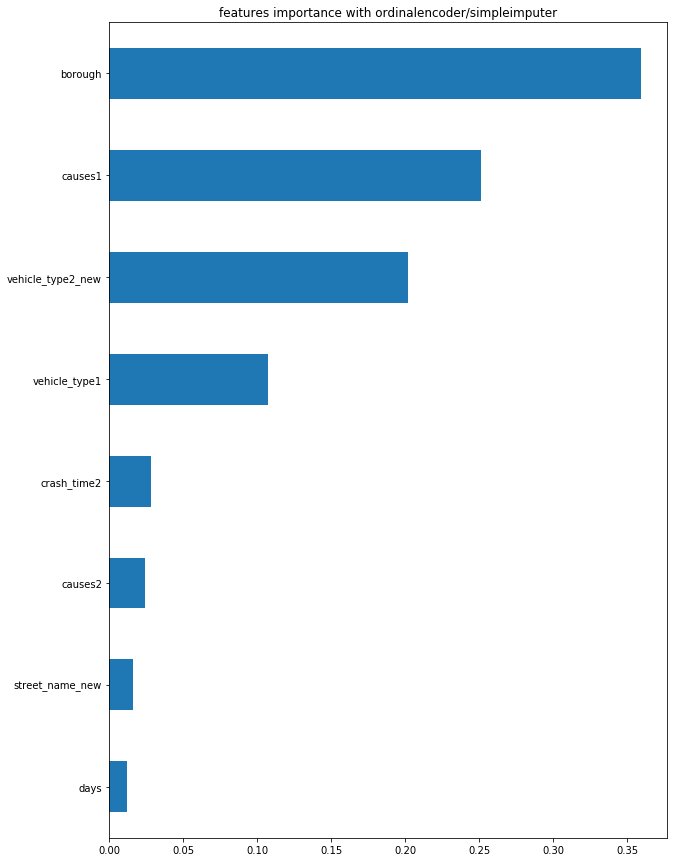

In [ ]:
# ordinal encoding 후, 모델의 feature importance 확인

importances = pd.Series(rf_pipe.named_steps['rf'].feature_importances_, X_train.columns)

plt.figure(figsize=(10,15))
plt.title(f'features importance with ordinalencoder/simpleimputer')
importances.sort_values().plot.barh();

##### gridsearhCV 파라미터 조정

In [ ]:
encoder = rf_pipe.named_steps['preprocessing'] # OrdinalEncoder(), SimpleImputer() 
X_train_encoded = encoder.fit_transform(X_train)
X_val_encoded = encoder.transform(X_val)
X_test_encoded = encoder.transform(X_test)

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [ ]:
%%time

rf_model = GridSearchCV(estimator= RandomForestClassifier(random_state=2),
                   param_grid=[{'max_depth': [5,8,10],
                                'min_samples_split':[2,3,5,7],
                                'n_estimators':[10,50,100],
                                'class_weight':['balanced']
                                }],
                   scoring='accuracy', 
                   cv=3) 

rf_model.fit(X_train_encoded, y_train)
print('best parameters : ', rf_model.best_params_)
print('best accuracy score : ', rf_model.best_score_)
em = rf_model.best_estimator_
rf_pred = rf_model.predict(X_val_encoded)

best parameters :  {'class_weight': 'balanced', 'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 100}
best accuracy score :  0.608734693877551
CPU times: user 3min 1s, sys: 1.02 s, total: 3min 2s
Wall time: 3min 1s


In [ ]:
rf_pred = rf_model.predict(X_test_encoded)
print(classification_report(y_test, rf_pred)) # 테스트 데이터에서 생각보다 높게 나옴
print('테스트세트 정확도: ', rf_model.score(X_test_encoded, y_test))

              precision    recall  f1-score   support

           0       0.84      0.63      0.72     27634
           1       0.39      0.67      0.49      9640

    accuracy                           0.64     37274
   macro avg       0.62      0.65      0.61     37274
weighted avg       0.73      0.64      0.66     37274

테스트세트 정확도:  0.6424048934914418


Text(0.5, 1.0, 'Confusion matrix, n = 37274')

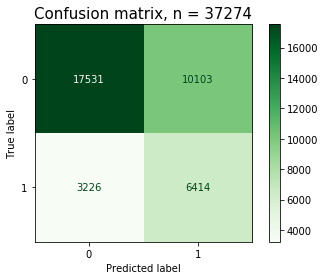

In [ ]:
fig, ax = plt.subplots()
pcm = plot_confusion_matrix(rf_model, X_test_encoded, y_test,
                            cmap=plt.cm.Greens,
                            ax=ax, values_format = '');
plt.title(f'Confusion matrix, n = {len(y_test)}', fontsize=15)

In [ ]:
TP, TN, FP, FN = 6572, 18002, 10457, 3256

accuracy = (TP + TN)/(TP+TN+FP+FN) 
precision = TP/(TP+FP)
recall = TP/(TP+FN)
beta = 1

def my_fbeta_score(precision, recall, beta=1.0):
  return (1.0 + (beta **2) ) * (precision * recall) / ( ((beta**2) * precision) + recall )

print('f beta score:', my_fbeta_score(precision, recall, beta))
print('accuracy :', accuracy)
print('precision :', precision)
print('recall :', recall)

f beta score: 0.48940685854711996
accuracy : 0.6418366547392065
precision : 0.3859298843149921
recall : 0.6687016687016687


#### Catboost 모델

In [ ]:
import catboost as cb
from catboost import CatBoostClassifier

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/usr/local/lib/python3.7/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/local/lib/python3.7/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


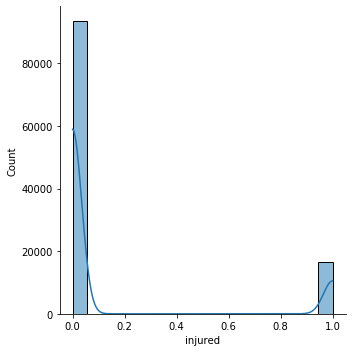

In [ ]:
from matplotlib import pyplot as plt

sns.displot(y_train, kde=True);

In [ ]:
y_train.value_counts(normalize=True)

0    0.848535
1    0.151465
Name: injured, dtype: float64

In [ ]:
0.849087/0.150913 # weight를 5.6배를주면 맞춰질듯

5.626334378085388

In [ ]:
import time
start = time.time()
cb_dtrain = cb.Pool(data = X_train_encoded, label = y_train)
cb_model = CatBoostClassifier (max_depth= 10,
            learning_rate = 0.02,
            iterations = 300,
            eval_metric = 'Accuracy',
            class_weights = [1, 5.6],
            task_type = 'GPU'
)

cb_model.fit(X_train_encoded,y_train)

0:	learn: 0.5978070	total: 40.4ms	remaining: 12.1s
1:	learn: 0.6224828	total: 80.7ms	remaining: 12s
2:	learn: 0.6346561	total: 119ms	remaining: 11.8s
3:	learn: 0.6342167	total: 153ms	remaining: 11.3s
4:	learn: 0.6319683	total: 187ms	remaining: 11s
5:	learn: 0.6319330	total: 220ms	remaining: 10.8s
6:	learn: 0.6331272	total: 254ms	remaining: 10.6s
7:	learn: 0.6320549	total: 286ms	remaining: 10.4s
8:	learn: 0.6320902	total: 317ms	remaining: 10.2s
9:	learn: 0.6330064	total: 334ms	remaining: 9.7s
10:	learn: 0.6397987	total: 352ms	remaining: 9.24s
11:	learn: 0.6426041	total: 370ms	remaining: 8.87s
12:	learn: 0.6515817	total: 388ms	remaining: 8.56s
13:	learn: 0.6525418	total: 406ms	remaining: 8.3s
14:	learn: 0.6434862	total: 424ms	remaining: 8.05s
15:	learn: 0.6439170	total: 441ms	remaining: 7.83s
16:	learn: 0.6433173	total: 462ms	remaining: 7.7s
17:	learn: 0.6432798	total: 482ms	remaining: 7.55s
18:	learn: 0.6522521	total: 500ms	remaining: 7.39s
19:	learn: 0.6534089	total: 519ms	remaining: 7

In [ ]:
pred = cb_model.predict(X_test_encoded)
print(classification_report(y_test, pred))
print('테스트세트 정확도: ', cb_model.score(X_test_encoded, y_test))

              precision    recall  f1-score   support

           0       0.87      0.61      0.72     27634
           1       0.40      0.74      0.52      9640

    accuracy                           0.64     37274
   macro avg       0.63      0.67      0.62     37274
weighted avg       0.75      0.64      0.67     37274

테스트세트 정확도:  0.6441487363846112


Text(0.5, 1.0, 'Confusion matrix, n = 37274')

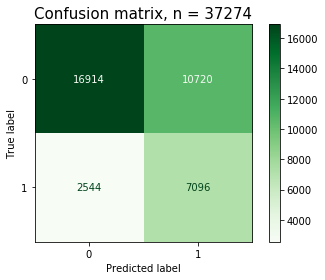

In [ ]:
fig, ax = plt.subplots()
pcm = plot_confusion_matrix(cb_model, X_test_encoded, y_test,
                            cmap=plt.cm.Greens,
                            ax=ax, values_format = '');
plt.title(f'Confusion matrix, n = {len(y_test)}', fontsize=15)

In [ ]:
TP, TN, FP, FN = 7279, 17434, 11025, 2549

accuracy = (TP + TN)/(TP+TN+FP+FN) 
precision = TP/(TP+FP)
recall = TP/(TP+FN)
beta = 1

def my_fbeta_score(precision, recall, beta=1.0):
  return (1.0 + (beta **2) ) * (precision * recall) / ( ((beta**2) * precision) + recall )

print('f beta score:', my_fbeta_score(precision, recall, beta))
print('accuracy :', accuracy)
print('precision :', precision)
print('recall :', recall)

f beta score: 0.5174889805204038
accuracy : 0.645467129835192
precision : 0.39767263986013984
recall : 0.7406389906389906


#### Xgboost 모델

In [ ]:
ratio = 0.849087 / 0.150913
ratio

5.626334378085388

In [ ]:
from xgboost import XGBClassifier


eval_set = [(X_train_encoded, y_train), 
            (X_val_encoded, y_val)]

# XGBoost 분류기를 학습시킵니다. 클래스 비율을 맞추기 위해 scale_pos_weight= #Charged Off / # Fully Paid
xg_model = XGBClassifier(n_estimators=300, n_jobs=-1, scale_pos_weight=ratio)
xg_model.fit(X_train_encoded, y_train, eval_set=eval_set, eval_metric='auc', early_stopping_rounds=10)

[0]	validation_0-auc:0.618552	validation_1-auc:0.611136
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 10 rounds.
[1]	validation_0-auc:0.626912	validation_1-auc:0.618516
[2]	validation_0-auc:0.63062	validation_1-auc:0.620451
[3]	validation_0-auc:0.636959	validation_1-auc:0.627678
[4]	validation_0-auc:0.637789	validation_1-auc:0.628357
[5]	validation_0-auc:0.643185	validation_1-auc:0.633738
[6]	validation_0-auc:0.648929	validation_1-auc:0.638027
[7]	validation_0-auc:0.667516	validation_1-auc:0.654879
[8]	validation_0-auc:0.666891	validation_1-auc:0.654286
[9]	validation_0-auc:0.66702	validation_1-auc:0.654344
[10]	validation_0-auc:0.67785	validation_1-auc:0.66738
[11]	validation_0-auc:0.679693	validation_1-auc:0.668671
[12]	validation_0-auc:0.679858	validation_1-auc:0.668589
[13]	validation_0-auc:0.680078	validation_1-auc:0.668959
[14]	validation_0-auc:0.681198	validation_1-auc:0.669667
[1

XGBClassifier(n_estimators=300, n_jobs=-1, scale_pos_weight=5.626334378085388)

In [ ]:
pred = xg_model.predict(X_test_encoded)
print(classification_report(y_test, pred)) 
print('테스트세트 정확도: ', xg_model.score(X_test_encoded, y_test))

              precision    recall  f1-score   support

           0       0.87      0.61      0.72     27634
           1       0.40      0.74      0.52      9640

    accuracy                           0.64     37274
   macro avg       0.63      0.67      0.62     37274
weighted avg       0.75      0.64      0.66     37274

테스트세트 정확도:  0.641573214573161


Text(0.5, 1.0, 'Confusion matrix, n = 37274')

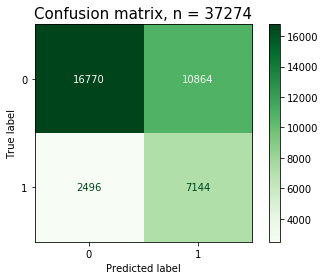

In [ ]:
fig, ax = plt.subplots()
pcm = plot_confusion_matrix(xg_model, X_test_encoded, y_test,
                            cmap=plt.cm.Greens,
                            ax=ax, values_format = '');
plt.title(f'Confusion matrix, n = {len(y_test)}', fontsize=15)

In [ ]:
TP, TN, FP, FN = 7183, 17666, 10793, 2645

accuracy = (TP + TN)/(TP+TN+FP+FN) 
precision = TP/(TP+FP)
recall = TP/(TP+FN)
beta = 1

def my_fbeta_score(precision, recall, beta=1.0):
  return (1.0 + (beta **2) ) * (precision * recall) / ( ((beta**2) * precision) + recall )

print('f beta score:', my_fbeta_score(precision, recall, beta))
print('accuracy :', accuracy)
print('precision :', precision)
print('recall :', recall)

f beta score: 0.516688246295497
accuracy : 0.6490192493535665
precision : 0.39958834000890076
recall : 0.7308709808709809


### 최종모델: Catboost 모델 - PDP Plots / Shap Force Plots

##### pip installs - pdp shap

In [ ]:
pip install delayed

In [ ]:
pip install pdpbox

##### 시각화

In [ ]:
from pdpbox.pdp import pdp_isolate, pdp_plot
import matplotlib

matplotlib.font_manager._rebuild() # Arial Font 불러오기 에러

In [ ]:
X_train_encoded_pd = pd.DataFrame(X_train_encoded, columns=X_train.columns)
X_test_encoded_pd = pd.DataFrame(X_test_encoded, columns=X_test.columns)
X_val_encoded_pd = pd.DataFrame(X_val_encoded, columns=X_val.columns)

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


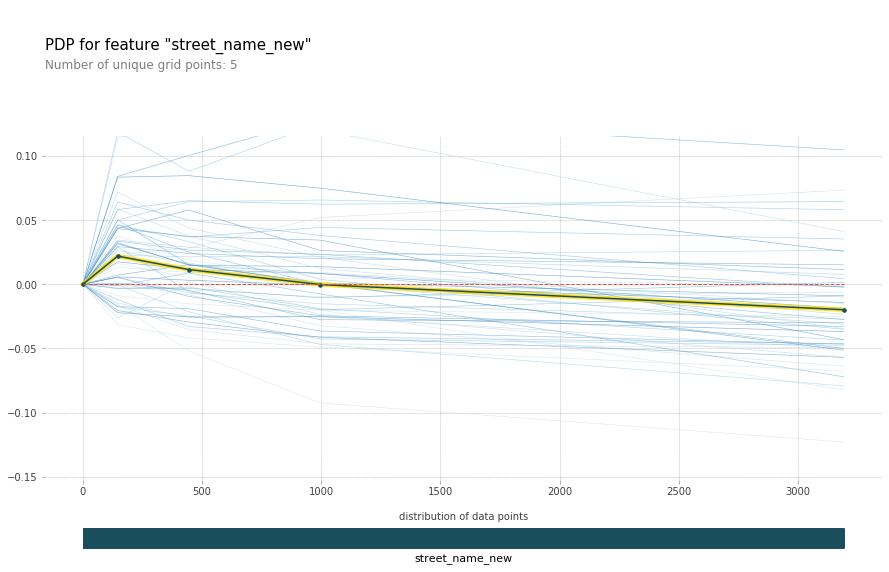

In [ ]:
feature = 'street_name_new'

isolated = pdp_isolate(
    model= cb_model, 
    dataset= X_train_encoded_pd, 
    model_features= X_train.columns, 
    feature= feature,
    grid_type='percentile', # default='percentile', or 'equal'
    num_grid_points=5 # default=10
)
pdp_plot(isolated, feature_name=feature, figsize = (15,10), plot_lines = True, frac_to_plot = 50, plot_pts_dist = True);

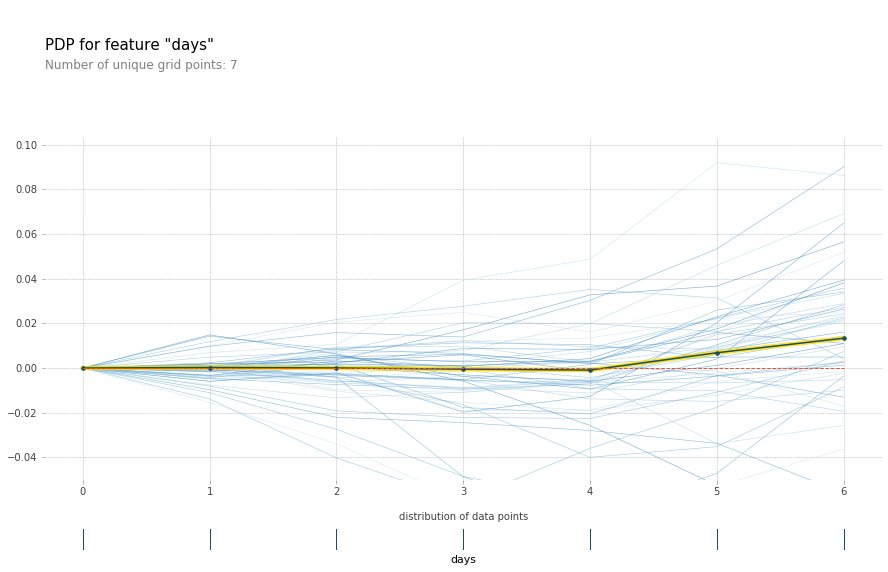

In [ ]:
feature = 'days'

isolated = pdp_isolate(
    model=cb_model, 
    dataset=X_train_encoded_pd, 
    model_features=X_train.columns, 
    feature=feature,
    grid_type='percentile', # default='percentile', or 'equal'
    num_grid_points=10 # default=10
)
pdp_plot(isolated, feature_name=feature, figsize = (15,10), plot_lines = True, frac_to_plot = 50, plot_pts_dist = True);

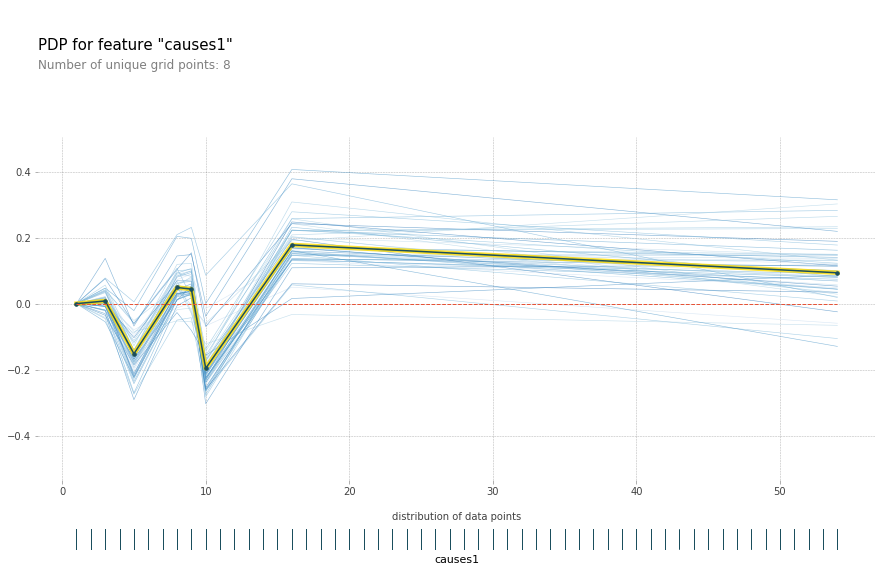

In [ ]:
feature = 'causes1'

isolated = pdp_isolate(
    model=cb_model, 
    dataset=X_train_encoded_pd, 
    model_features=X_train.columns, 
    feature=feature,
    grid_type='percentile', # default='percentile', or 'equal'
    num_grid_points=10 # default=10
)
pdp_plot(isolated, feature_name=feature, figsize = (15,10), plot_lines = True, frac_to_plot = 50, plot_pts_dist = True);

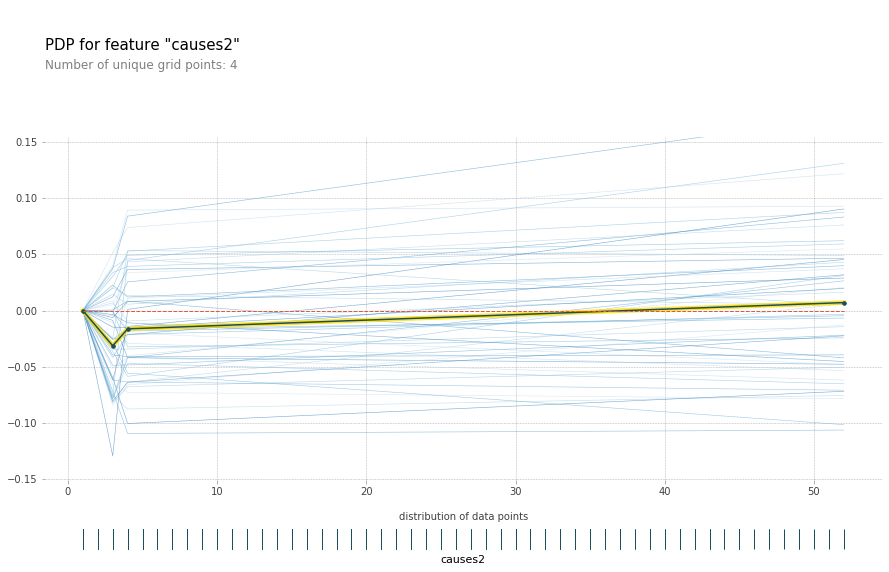

In [ ]:
feature = 'causes2'

isolated = pdp_isolate(
    model=cb_model, 
    dataset=X_train_encoded_pd, 
    model_features=X_train.columns, 
    feature=feature,
    grid_type='percentile', # default='percentile', or 'equal'
    num_grid_points=10 # default=10
)
pdp_plot(isolated, feature_name=feature, figsize = (15,10), plot_lines = True, frac_to_plot = 50, plot_pts_dist = True);

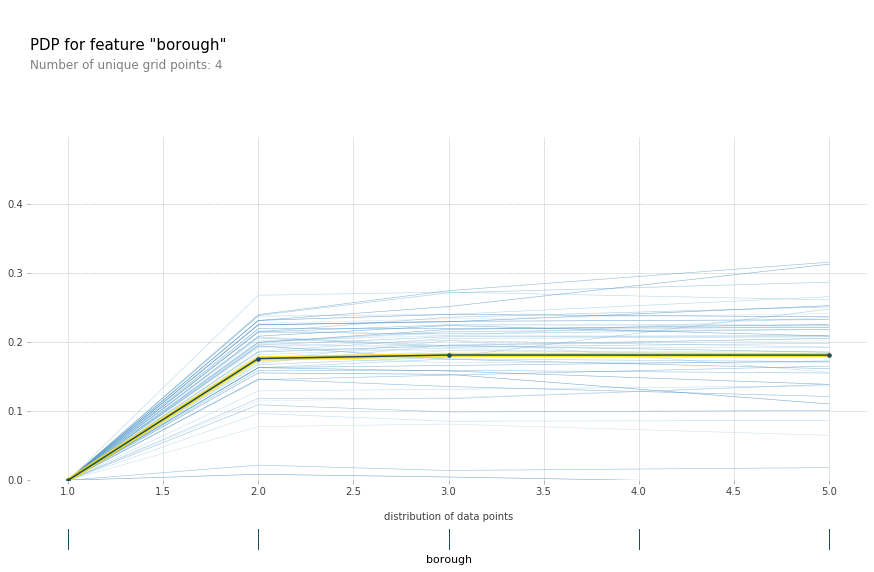

In [ ]:
feature = 'borough'

isolated = pdp_isolate(
    model=cb_model, 
    dataset=X_train_encoded_pd, 
    model_features=X_train.columns, 
    feature=feature,
    grid_type='percentile', # default='percentile', or 'equal'
    num_grid_points=10 # default=10
)
pdp_plot(isolated, feature_name=feature, figsize = (15,10), plot_lines = True, frac_to_plot = 50, plot_pts_dist = True);

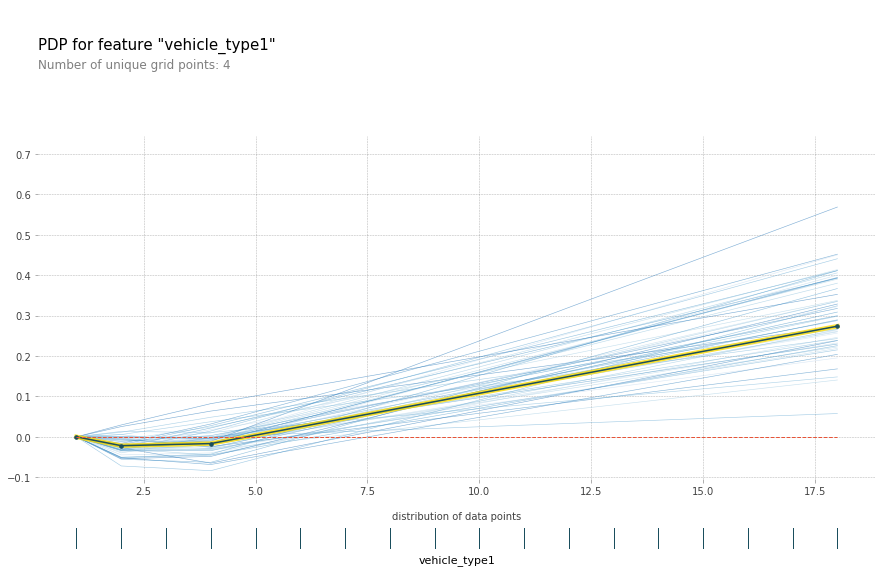

In [ ]:
feature = 'vehicle_type1'

isolated = pdp_isolate(
    model=cb_model, 
    dataset=X_train_encoded_pd, 
    model_features=X_train.columns, 
    feature=feature,
    grid_type='percentile', # default='percentile', or 'equal'
    num_grid_points=10 # default=10
)
pdp_plot(isolated, feature_name=feature, figsize = (15,10), plot_lines = True, frac_to_plot = 50, plot_pts_dist = True);

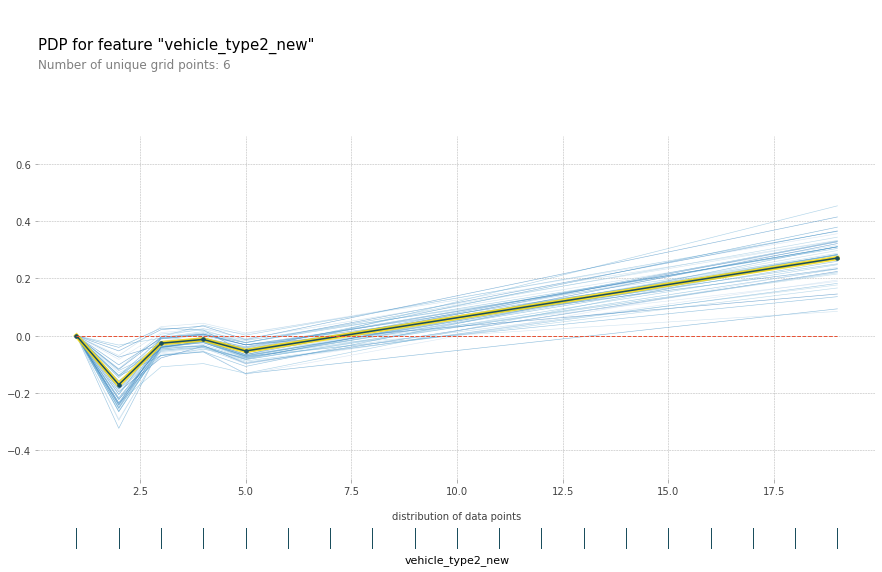

In [ ]:
feature = 'vehicle_type2_new'

isolated = pdp_isolate(
    model=cb_model, 
    dataset=X_train_encoded_pd, 
    model_features=X_train.columns, 
    feature=feature,
    grid_type='percentile', # default='percentile', or 'equal'
    num_grid_points=10 # default=10
)
pdp_plot(isolated, feature_name=feature, figsize = (15,10), plot_lines = True, frac_to_plot = 50, plot_pts_dist = True);

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


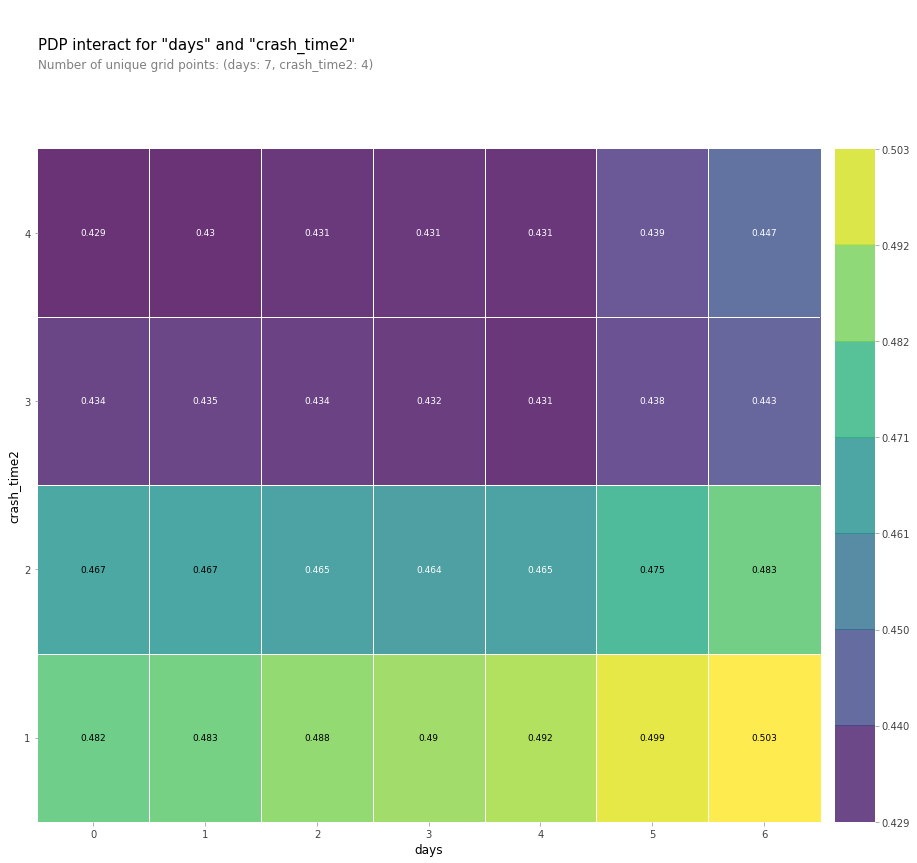

In [ ]:
from pdpbox.pdp import pdp_interact, pdp_interact_plot

features = ['days', 'crash_time2']

interaction = pdp_interact(
    model=cb_model, 
    dataset=X_train_encoded_pd,
    model_features=X_train.columns, 
    features=features
)

pdp_interact_plot(interaction, plot_type='grid', 
                  feature_names=features, figsize = (15,15));

##### SHAP

In [ ]:
row = X_test_encoded_pd.iloc[[3]] # X_test의 첫번째 행 가져오기

In [ ]:
y_test[3] # 실제값

0

In [ ]:
cb_model.predict(row) # 예측이랑 다름

array([0])

In [ ]:
import shap

explainer = shap.TreeExplainer(cb_model)
shap_values = explainer.shap_values(row)

shap.initjs()
shap.force_plot(
    base_value=explainer.expected_value, 
    shap_values=shap_values,
    features=row
)

# 결과를 보니, 좌측에 있는 CRIM은 가격을 올리는 양적인 특성인걸 확인 할 수 있다.

In [ ]:
row2 = X_test_encoded_pd.iloc[[9313]] # X_test의 첫번째 행 가져오기
y_test[9323]

0

In [ ]:
cb_model.predict(row)

array([0])

In [ ]:
explainer = shap.TreeExplainer(cb_model)
shap_values = explainer.shap_values(row2)

shap.initjs()
shap.force_plot(
    base_value=explainer.expected_value, 
    shap_values=shap_values,
    features=row2
)

# 결과를 보니, 좌측에 있는 1을 예측하는 특성들이 보인다.

In [ ]:
row3 = X_test_encoded_pd.iloc[[1571]] # X_test의 첫번째 행 가져오기
y_test[1571]

0

In [ ]:
cb_model.predict(row3)

array([1])

In [ ]:
explainer = shap.TreeExplainer(cb_model)
shap_values = explainer.shap_values(row3)

shap.initjs()
shap.force_plot(
    base_value=explainer.expected_value, 
    shap_values=shap_values,
    features=row3
)

# 결과를 보니, 우측에 0을 예측하는 특성들이 보인다

In [ ]:
import eli5
from eli5.sklearn import PermutationImportance

In [ ]:
permuter = PermutationImportance(
    cb_model, # model
    scoring='accuracy', # metric
    random_state=2
)

permuter.fit(X_val_encoded, y_val);

#순열중요도
feature_names = X_val.columns.tolist()
pd.Series(permuter.feature_importances_, feature_names).sort_values()

street_name_new     -0.000882
days                 0.000280
vehicle_type1        0.002564
crash_time2          0.002624
causes2              0.003183
borough              0.009699
causes1              0.031225
vehicle_type2_new    0.032784
dtype: float64

In [ ]:
eli5.show_weights(
    permuter, 
    top=None, # top n 지정 가능, None 일 경우 모든 특성 
    feature_names=feature_names
)

Weight,Feature
0.0328 ± 0.0020,vehicle_type2_new
0.0312 ± 0.0020,causes1
0.0097 ± 0.0027,borough
0.0032 ± 0.0003,causes2
0.0026 ± 0.0016,crash_time2
0.0026 ± 0.0015,vehicle_type1
0.0003 ± 0.0009,days
-0.0009 ± 0.0008,street_name_new


### 2번째 모델

In [ ]:
df

,borough,causes1,causes2,vehicle_type1,injured,crash_time2,vehicle_type2_new,days,street_name_new
crash_date,,,,,,,,,
2019-09-01,MANHATTAN,Oversized Vehicle,Unspecified,Sedan,False,afternoon,Bus,Sunday,WEST 40 STREET
2019-09-01,QUEENS,Following Too Closely,Unspecified,Sedan,False,afternoon,Sedan,Sunday,149 STREET
2019-09-01,QUEENS,Turning Improperly,Unspecified,Station Wagon/Sport Utility Vehicle,False,midnight,Station Wagon/Sport Utility Vehicle,Sunday,115 AVENUE
2019-09-01,QUEENS,Driver Inattention/Distraction,Driver Inattention/Distraction,Sedan,True,midnight,Sedan,Sunday,147 STREET
2019-09-01,BROOKLYN,Following Too Closely,Unspecified,Station Wagon/Sport Utility Vehicle,False,afternoon,Station Wagon/Sport Utility Vehicle,Sunday,PROSPECT PARK SOUTHWEST
...,...,...,...,...,...,...,...,...,...
2021-08-28,BROOKLYN,Failure to Yield Right-of-Way,Unspecified,Sedan,False,afternoon,Unspecified,Saturday,NEPTUNE AVENUE
2021-08-28,BRONX,Passing Too Closely,Unspecified,Sedan,False,midnight,Unspecified,Saturday,WEBSTER AVENUE
2021-08-28,QUEENS,Failure to Yield Right-of-Way,Unspecified,Station Wagon/Sport Utility Vehicle,False,evening,Station Wagon/Sport Utility Vehicle,Saturday,116 AVENUE


In [ ]:
y_train.value_counts(normalize=True) #타겟 비율 체크

False    0.802523
True     0.197477
Name: injured, dtype: float64

In [ ]:
pipe2 = make_pipeline(
    OrdinalEncoder(), 
    DecisionTreeClassifier(max_depth=5, class_weight='balanced', random_state=2)
)

pipe2.fit(X_train, y_train)

y_pred = pipe2.predict(X_test)
print(classification_report(y_test, y_pred))
print('검증 정확도: ', pipe2.score(X_test, y_test))

              precision    recall  f1-score   support

       False       0.86      0.58      0.69     10330
        True       0.40      0.76      0.53      3878

    accuracy                           0.63     14208
   macro avg       0.63      0.67      0.61     14208
weighted avg       0.74      0.63      0.65     14208

검증 정확도:  0.6273930180180181


In [ ]:
pipe2 = make_pipeline(
    OrdinalEncoder(), 
    DecisionTreeClassifier(max_depth=5, class_weight='balanced', random_state=2)
)

pipe2.fit(X_train, y_train)

y_pred = pipe2.predict(X_test)
print(classification_report(y_test, y_pred))
print('검증 정확도: ', pipe2.score(X_test, y_test))

              precision    recall  f1-score   support

       False       0.86      0.58      0.69     10330
        True       0.40      0.76      0.53      3878

    accuracy                           0.63     14208
   macro avg       0.63      0.67      0.61     14208
weighted avg       0.74      0.63      0.65     14208

검증 정확도:  0.6273930180180181


In [ ]:
pipe2 = make_pipeline(
    OrdinalEncoder(), 
    DecisionTreeClassifier(max_depth=5, class_weight='balanced', random_state=2)
)

pipe2.fit(X_train, y_train)

y_pred = pipe2.predict(X_test)
print(classification_report(y_test, y_pred))
print('검증 정확도: ', pipe2.score(X_test, y_test))

              precision    recall  f1-score   support

       False       0.86      0.44      0.58     27634
        True       0.33      0.79      0.47      9640

    accuracy                           0.53     37274
   macro avg       0.59      0.62      0.52     37274
weighted avg       0.72      0.53      0.55     37274

검증 정확도:  0.5314696571336589


In [ ]:
pipe2 = make_pipeline(
    OrdinalEncoder(), 
    DecisionTreeClassifier(max_depth=5, class_weight='balanced', random_state=2)
)

pipe2.fit(X_train, y_train)

y_pred = pipe2.predict(X_test)
print(classification_report(y_test, y_pred))
print('검증 정확도: ', pipe2.score(X_test, y_test))

              precision    recall  f1-score   support

       False       0.89      0.43      0.58     10330
        True       0.36      0.86      0.51      3878

    accuracy                           0.55     14208
   macro avg       0.62      0.64      0.54     14208
weighted avg       0.74      0.55      0.56     14208

검증 정확도:  0.5472972972972973


Text(0.5, 1.0, 'Confusion matrix, n = 14208')

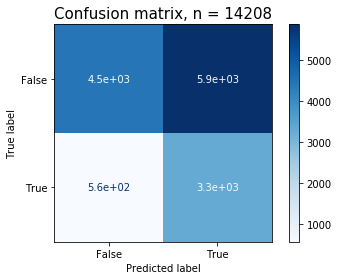

In [ ]:
fig, ax = plt.subplots()
pcm = plot_confusion_matrix(pipe2, X_test, y_test,
                            cmap=plt.cm.Blues,
                            ax=ax);
plt.title(f'Confusion matrix, n = {len(y_test)}', fontsize=15)

AUC score:  0.6836773029480471


Text(0, 0.5, 'TPR')

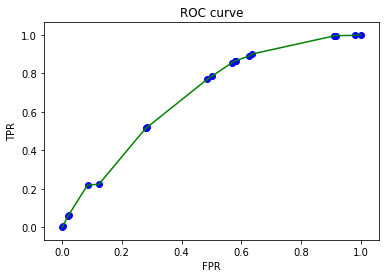

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve

y_pred_proba = pipe2.predict_proba(X_test)[:, -1]
print('AUC score: ', roc_auc_score(y_test, y_pred_proba))
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.scatter(fpr, tpr, color='blue')
plt.plot(fpr, tpr, color='green')
plt.title('ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')

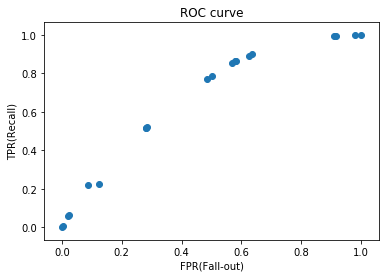

In [ ]:
plt.scatter(fpr, tpr)
plt.title('ROC curve')
plt.xlabel('FPR(Fall-out)')
plt.ylabel('TPR(Recall)');

In [ ]:
import numpy as np

# threshold 최대값의 인덱스, np.argmax()
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

print('idx:', optimal_idx, ', threshold:', optimal_threshold)

idx: 11 , threshold: 0.5837860803370479


In [ ]:
df.isna().sum()

CRASH DATE                          0
BOROUGH                             0
LATITUDE                            0
LONGITUDE                           0
ON STREET NAME                      0
CONTRIBUTING FACTOR VEHICLE 1       0
CONTRIBUTING FACTOR VEHICLE 2    7936
COLLISION_ID                        0
VEHICLE TYPE CODE 1                 0
injured                             0
time                                0
dtype: int64